In [7]:
import numpy as np
import pandas as pd
import os
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from final_data_preprocessing import preprocess_liver_disorder_data
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from data_preprocessing import load_dataset, balance_liver_data, remove_duplicates, normalize_data

In [8]:
# Load the dataset
# file_path = 'liver_disorder_dataset.csv'
# dataset = preprocess_liver_disorder_data(file_path)

# X = dataset.drop('CLASS', axis=1)
# Y = dataset['CLASS']

# Load and preprocess your dataset
data = load_dataset(file_path)
data = balance_liver_data(data)
data = remove_duplicates(data)

In [9]:
# X = dataset[['GGT', 'AAP', 'TB', 'DB', 'IB', 'DELTA B']]
# Y = dataset['CLASS']
# Select features and target
feature_names = ['GGT', 'AAP', 'TB', 'DB', 'IB', 'DELTA B']
X = data[feature_names]
Y = data['CLASS']

# Normalize the data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')


# # Splitting the data into training and test sets
# normalized_X_train, normalized_X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Creating the RandomForestClassifier with a limited depth
model = RandomForestClassifier(criterion='entropy', random_state=0, n_estimators=20, max_depth=5)

# Training the model
model.fit(X_normalized, Y)

# Save the trained model to a file
model_filename = 'rf_classifier_model.pkl'
joblib.dump(model, model_filename)

print(f'Model saved as {model_filename}')


Model saved as rf_classifier_model.pkl


In [10]:
# Save the MinMaxScaler used during normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(dataset.drop(columns=['CLASS']))
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [36]:
# Evaluating the model on the training set
train_accuracy = model.score(normalized_X_train, y_train)
print('Accuracy of RF classifier on training set: {:.4f}'.format(train_accuracy))

# Evaluating the model on the test set
test_accuracy = model.score(normalized_X_test, y_test)
print('Accuracy of RF classifier on test set: {:.4f}'.format(test_accuracy))

# Making predictions on the test set
y_pred = model.predict(normalized_X_test)

# Calculating the accuracy of the predictions
accuracy = metrics.accuracy_score(y_test, y_pred) * 100
print('Accuracy of RF classifier on test set (percentage): {:.2f}%'.format(accuracy))

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Generating the classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy of RF classifier on training set: 0.9945
Accuracy of RF classifier on test set: 0.9891
Accuracy of RF classifier on test set (percentage): 98.91%
Confusion Matrix:
[[821   0]
 [ 18 806]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       821
           1       1.00      0.98      0.99       824

    accuracy                           0.99      1645
   macro avg       0.99      0.99      0.99      1645
weighted avg       0.99      0.99      0.99      1645



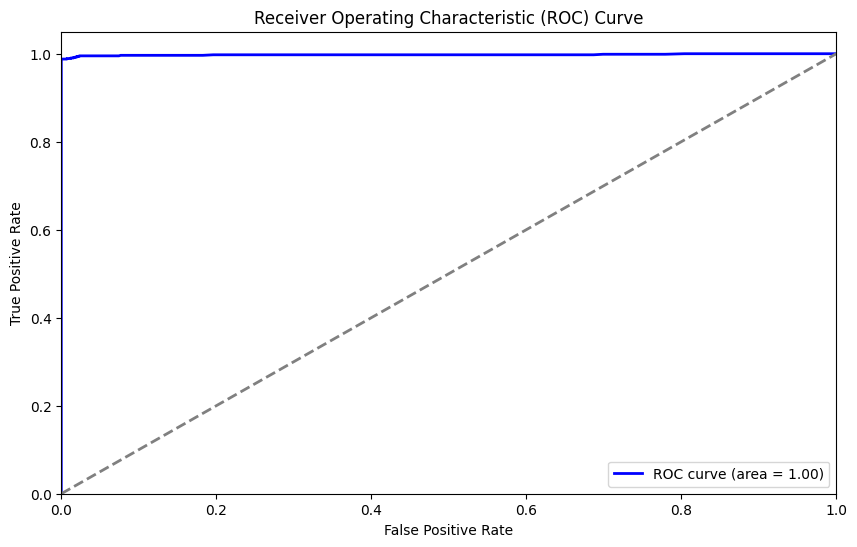

In [37]:
# Getting the predicted probabilities for the test set
y_prob = model.predict_proba(normalized_X_test)[:, 1]

# Calculating the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculating the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

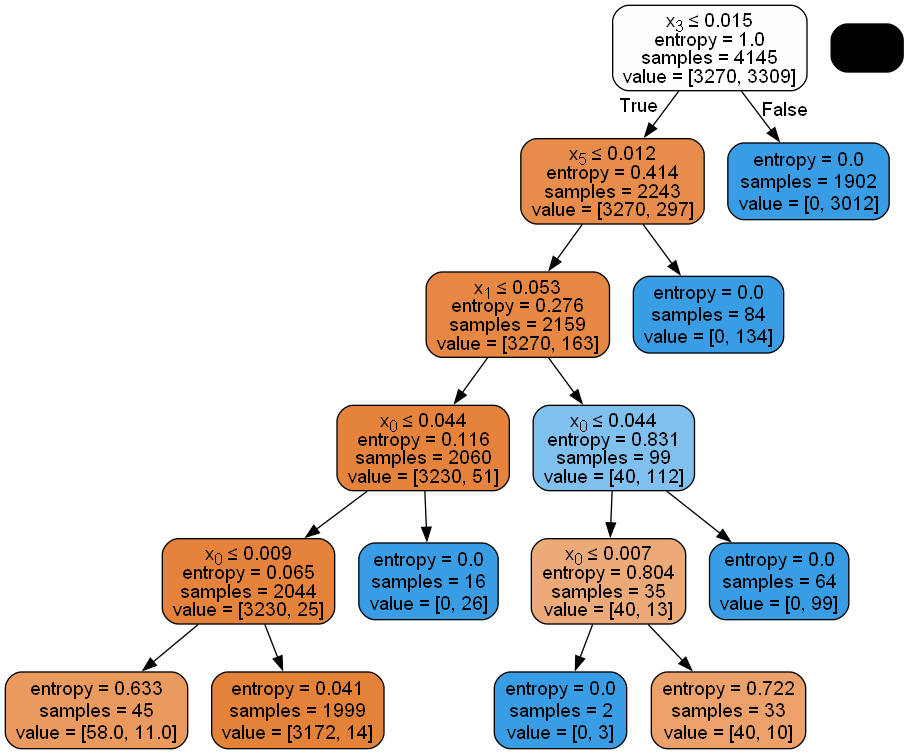

In [38]:
estimator = model.estimators_[4]
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'  # Adjust this path as needed

dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
